<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


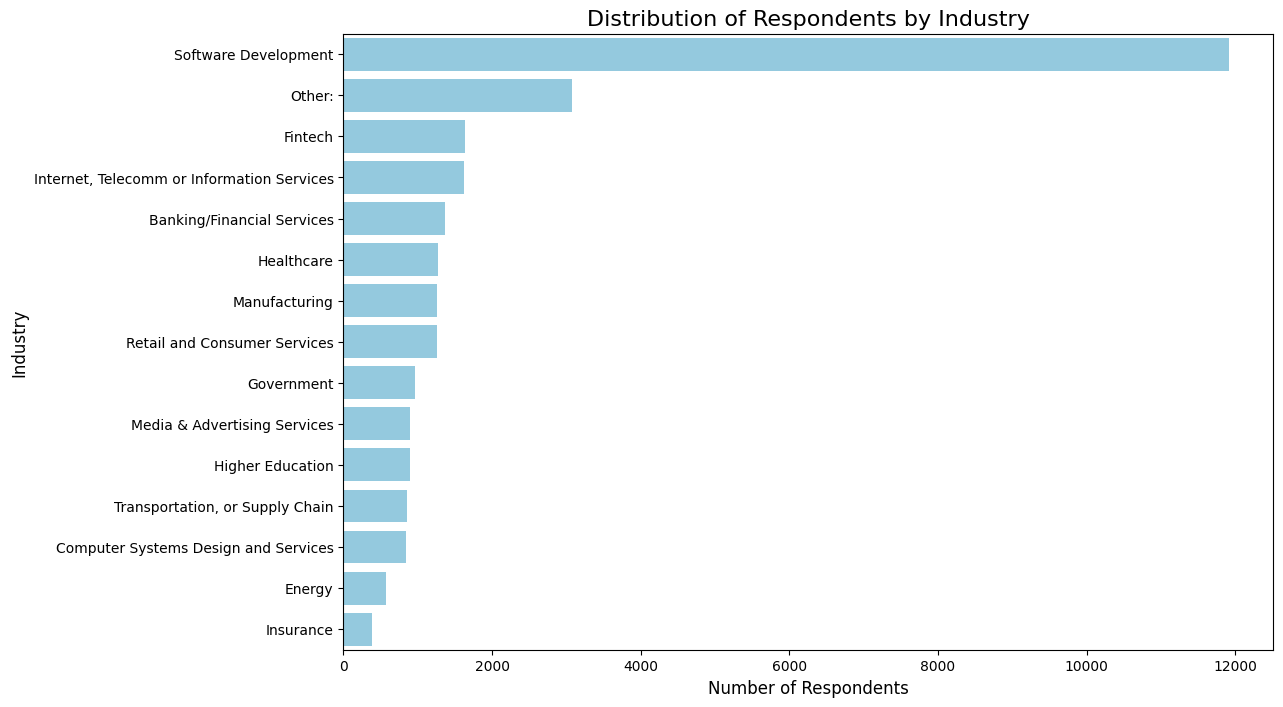

In [4]:
industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=industry_counts.values, y=industry_counts.index, color='skyblue')
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.show()

<h3>Notable Trends</h3>

- Software Development Dominates: This industry has the largest number of respondents, reflecting the survey's tech-focused audience.

- "Other" Category: The second largest, highlighting diverse industries not explicitly listed.

- Tech Industries Lead: Significant representation from Fintech, Telecom, and Banking/Financial Services, showing high demand for tech professionals.

- Lower Representation: Traditional sectors like Insurance, Energy, and Transportation have fewer respondents, indicating less tech engagement or survey participation.

- Moderate Participation: Healthcare, Manufacturing, Government, and Higher Education show moderate engagement, reflecting growing but limited tech adoption.


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [8]:
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean: {mean_comp:.2f}")
print(f"Median: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

Mean: 86155.29
Median: 65000.00
Standard Deviation: 186756.97


In [10]:
threshold = mean_comp + 3 * std_comp
high_outliers = df[df['ConvertedCompYearly'] > threshold]
print(high_outliers[['ConvertedCompYearly']].head())

      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [14]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1 (25th percentile): 32712.0
Q3 (75th percentile): 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75


In [15]:
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['ConvertedCompYearly']])

Number of outliers: 978
       ConvertedCompYearly
428               230000.0
456               300000.0
461               254425.0
529               650000.0
545               400000.0
...                    ...
40952             750000.0
41000             235000.0
41001             260000.0
41027             700000.0
41187             222834.0

[978 rows x 1 columns]


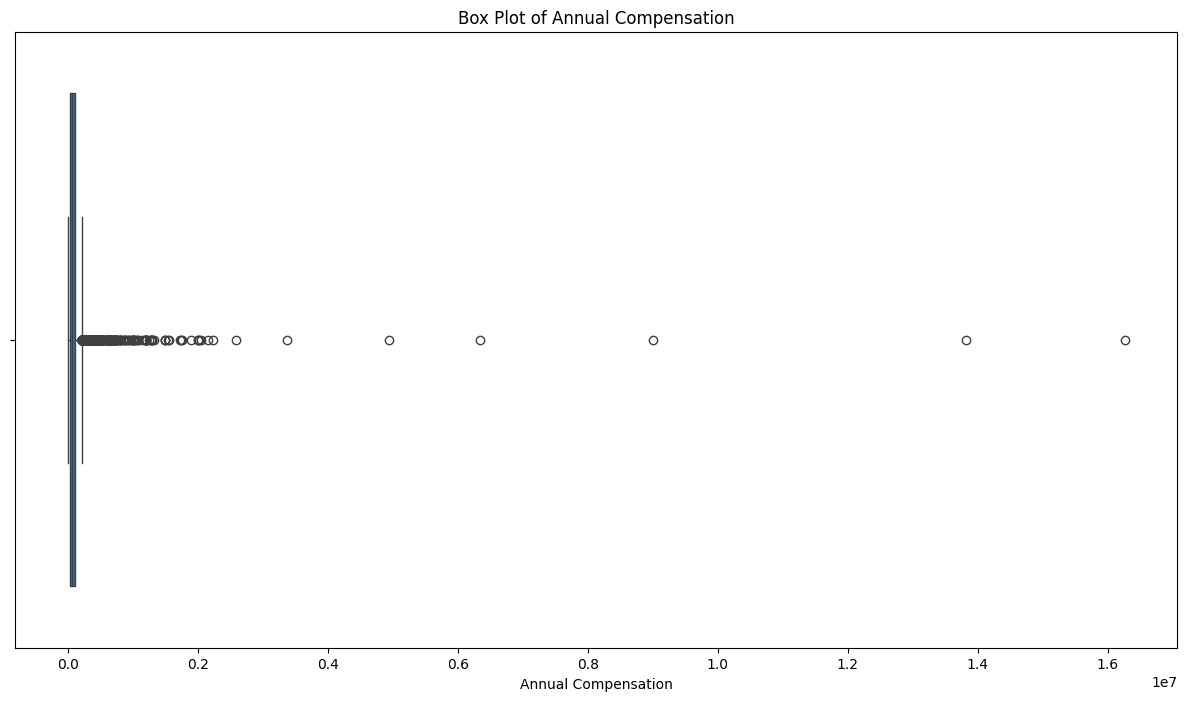

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of Annual Compensation')
plt.xlabel('Annual Compensation')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [20]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original DataFrame size: {df.shape[0]} rows")
print(f"New DataFrame size after removing outliers: {df_no_outliers.shape[0]} rows")

Original DataFrame size: 65437 rows
New DataFrame size after removing outliers: 22457 rows


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [21]:
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
print(df[['Age', 'AgeNumeric']].head())


                  Age  AgeNumeric
0  Under 18 years old        15.0
1     35-44 years old        39.0
2     45-54 years old        49.0
3     18-24 years old        21.0
4     18-24 years old        21.0


In [23]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
age_correlations = correlation_matrix['AgeNumeric'].sort_values(ascending=False)
print(age_correlations)

AgeNumeric             1.000000
WorkExp                0.852100
ConvertedCompYearly    0.120887
JobSat                 0.069788
CompTotal             -0.002823
JobSatPoints_1        -0.028070
ResponseId            -0.037710
JobSatPoints_8        -0.045874
JobSatPoints_6        -0.050342
JobSatPoints_4        -0.075944
JobSatPoints_9        -0.081442
JobSatPoints_7        -0.082037
JobSatPoints_5        -0.101310
JobSatPoints_11       -0.106925
JobSatPoints_10       -0.114083
Name: AgeNumeric, dtype: float64


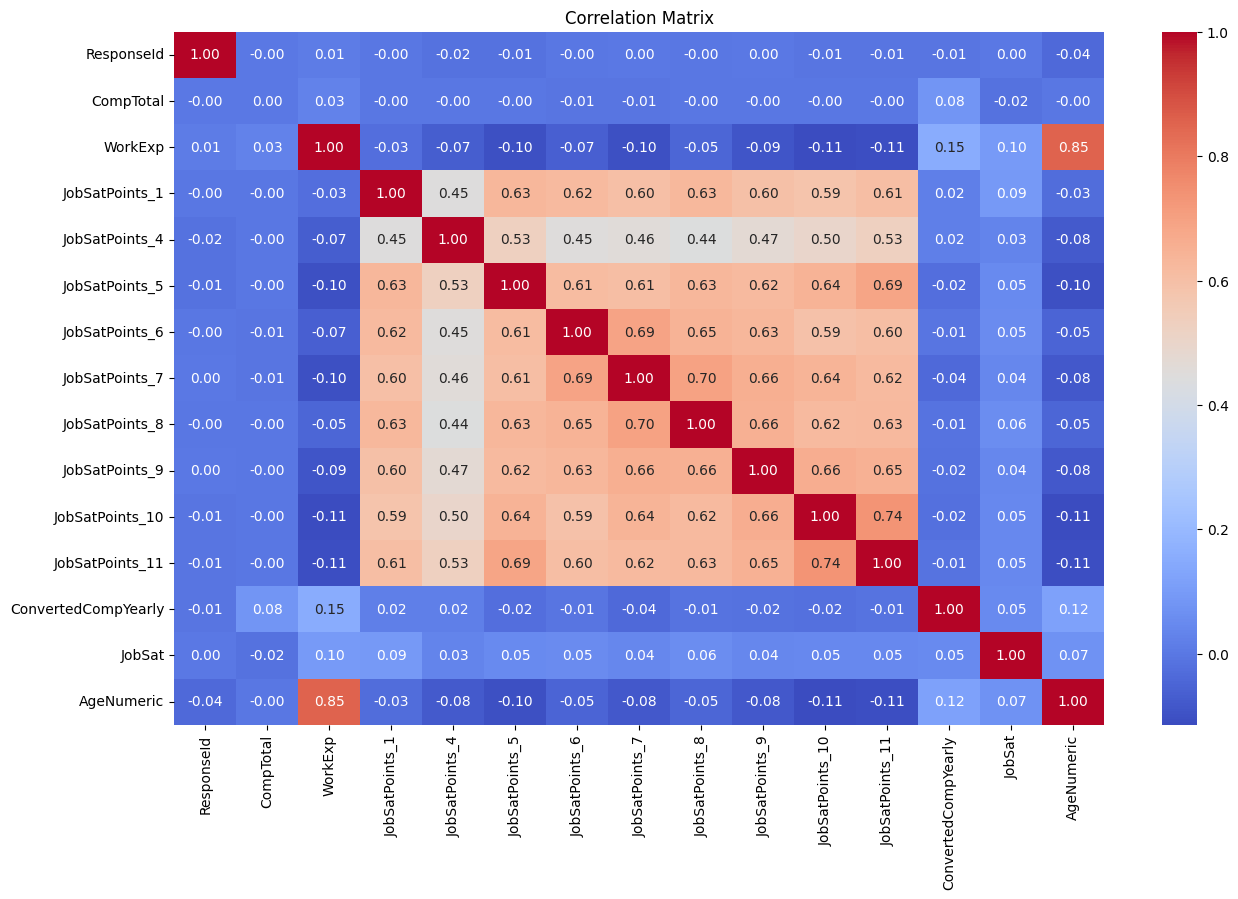

In [25]:
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
